Internet use and religion in Europe
-----------------------------------------

This notebook presents a quick-and-dirty analysis of the association between Internet use and religion in Europe, using data from the European Social Survey (http://www.europeansocialsurvey.org).

Copyright 2015 Allen Downey

MIT License: http://opensource.org/licenses/MIT

In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd

import thinkstats2
import thinkplot

import statsmodels.formula.api as smf

%matplotlib inline

The following function selects the columns I need.

In [2]:
def read_cycle(filename):
    """Reads a file containing ESS data and selects columns.
    
    filename: string
    
    returns: DataFrame
    """ 
    df = pd.read_stata(filename, convert_categoricals=False)

    if 'hinctnta' not in df.columns:
        df['hinctnta'] = df.hinctnt
        
    cols = ['cntry', 'tvtot', 'tvpol', 'rdtot', 'rdpol', 'nwsptot', 'nwsppol', 'netuse', 
            'rlgblg', 'rlgdgr', 'eduyrs', 'hinctnta', 'yrbrn', 'eisced', 'pspwght', 'pweight']
    df = df[cols]
    return df

Read data from Cycle 1.

In [3]:
df1 = read_cycle('ESS1e06_4.dta')
df1.head()

,cntry,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,rlgdgr,eduyrs,hinctnta,yrbrn,eisced,pspwght,pweight
0,AT,1,1,1,1,1,1,5,1,8,11,77,1949,0,0.940933,0.271488
1,AT,3,2,4,1,2,2,6,2,5,14,2,1953,0,0.470466,0.271488
2,AT,7,3,0,66,0,66,0,1,7,9,77,1940,0,1.392155,0.271488
3,AT,1,1,1,1,2,2,4,1,7,18,9,1959,0,1.382163,0.271488
4,AT,0,66,1,1,0,66,7,1,10,15,9,1962,0,1.437766,0.271488


Read data from Cycle 2.

In [4]:
df2 = read_cycle('ESS2e03_4.dta')
df2.head()

,cntry,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,rlgdgr,eduyrs,hinctnta,yrbrn,eisced,pspwght,pweight
0,AT,3,2,0,66,4,2,7,1,7,12,8,1971,0,0.682185,0.302006
1,AT,7,2,3,1,5,2,0,1,7,8,4,1925,0,0.565038,0.302006
2,AT,6,2,1,0,1,0,6,2,4,13,6,1977,0,0.341133,0.302006
3,AT,3,1,2,1,2,1,7,1,5,8,9,1989,0,0.804050,0.302006
4,AT,2,1,1,1,1,1,4,2,1,11,88,1988,0,1.125251,0.302006


Read data from Cycle 3.

In [5]:
df3 = read_cycle('ESS3e03_5.dta')
df3.head()

,cntry,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,rlgdgr,eduyrs,hinctnta,yrbrn,eisced,pspwght,pweight
0,AT,5,1,7,2,0,66,6,1,3,11,7,1980,0,0.949578,0.289116
1,AT,3,1,2,1,2,1,7,1,9,20,5,1974,0,1.412180,0.289116
2,AT,1,1,7,2,2,1,7,1,6,16,77,1954,0,0.723276,0.289116
3,AT,4,1,7,2,3,2,6,1,5,12,88,1967,0,0.625744,0.289116
4,AT,6,2,6,2,3,1,0,1,7,11,88,1971,0,0.417162,0.289116


Read data from Cycle 4.

In [6]:
df4 = read_cycle('ESS4e04_3.dta')
df4.head()

,cntry,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,rlgdgr,eduyrs,hinctnta,yrbrn,eisced,pspwght,pweight
0,BE,7,1,0,66,0,66,0,2,1,18,4,1972,6,0.823223,0.503773
1,BE,7,2,7,3,0,66,0,2,0,15,7,1982,6,0.798610,0.503773
2,BE,2,2,3,3,3,3,7,1,6,18,10,1940,7,0.778020,0.503773
3,BE,7,2,2,2,2,2,0,1,6,15,7,1931,6,0.777735,0.503773
4,BE,0,66,3,0,1,1,7,2,0,13,7,1982,4,0.960960,0.503773


Read data from Cycle 5.

In [7]:
df5 = read_cycle('ESS5e03_2.dta')
df5.head()

,cntry,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,rlgdgr,eduyrs,hinctnta,yrbrn,eisced,pspwght,pweight
0,BE,5,1,1,0,1,1,2,1,5,15,88,1988,4,0.792865,0.528619
1,BE,4,3,2,2,1,2,6,2,7,15,5,1967,6,0.871107,0.528619
2,BE,4,0,0,66,0,66,7,2,0,13,1,1991,3,0.799453,0.528619
3,BE,2,2,7,2,0,66,7,1,5,15,10,1987,6,0.816030,0.528619
4,BE,7,3,7,4,0,66,0,2,5,15,6,1952,6,0.764902,0.528619


In [8]:
def clean_cycle(df):
    """Cleans data from one cycle.
    
    df: DataFrame
    """
    df.tvtot.replace([77, 88, 99], np.nan, inplace=True)
    df.rdtot.replace([77, 88, 99], np.nan, inplace=True)
    df.nwsptot.replace([77, 88, 99], np.nan, inplace=True)
    df.netuse.replace([77, 88, 99], np.nan, inplace=True)
    df.tvpol.replace([66, 77, 88, 99], np.nan, inplace=True)
    df.rdpol.replace([66, 77, 88, 99], np.nan, inplace=True)
    df.nwsppol.replace([66, 77, 88, 99], np.nan, inplace=True)
    df.eduyrs.replace([77, 88, 99], np.nan, inplace=True)
    df.rlgblg.replace([7, 8, 9], np.nan, inplace=True)
    df.rlgdgr.replace([77, 88, 99], np.nan, inplace=True)
    df.hinctnta.replace([77, 88, 99], np.nan, inplace=True)
    df.yrbrn.replace([7777, 8888, 9999], np.nan, inplace=True)
    
    df['hasrelig'] = (df.rlgblg==1).astype(int)
    df.loc[df.rlgblg.isnull(), 'hasrelig'] = np.nan
    
    df['yrbrn60'] = df.yrbrn - 1960

In [9]:
cycles = [df1, df2, df3, df4, df5]
for cycle in cycles:
    clean_cycle(cycle)

In [10]:
def resample(df):
    """Resample data by country.
    
    df: DataFrame
    
    returns: map from country code to DataFrame
    """
    res = {}
    grouped = df.groupby('cntry')
    for name, group in grouped:
        sample = group.sample(len(group), weights=group.pspwght, replace=True)
        sample.index = range(len(group))
        res[name] = sample
    return res

# each cycle_map is a map from country code to DataFrame
cycle_maps = [resample(cycle) for cycle in cycles]
for cycle_map in cycle_maps:
    print(len(cycle_map), 'countries')

22 countries
25 countries
23 countries
29 countries
27 countries


TODO: Find out which questons were omitted in which countries during which cycles.

In [11]:
len(cycle_maps[0]['AT']['netuse'].dropna())

2234

In [12]:
len(cycle_maps[0]['DE']['netuse'].dropna())

0

In [13]:
def check_variables(name, group):
    varnames = ['cntry', 'tvtot', 'tvpol', 'rdtot', 'rdpol', 
                'nwsptot', 'nwsppol', 'netuse', 
                'rlgblg', 'rlgdgr', 'eduyrs', 'hinctnta', 
                'yrbrn', 'pspwght', 'pweight']
    for var in varnames:
        n = len(group[var].dropna())
        if (n < 100):
            print(name, var, len(group[var].dropna()))

for i, cycle_map in enumerate(cycle_maps):
    print('Cycle', i+1)
    for name, group in cycle_map.items():
        check_variables(name, group)

Cycle 1
FR netuse 0
FR hinctnta 0
DE netuse 0
HU hinctnta 0
IE hinctnta 0
Cycle 2
FR netuse 0
FI rlgblg 0
EE hinctnta 0
UA hinctnta 0
Cycle 3
HU hinctnta 0
EE hinctnta 0
UA hinctnta 0
Cycle 4
BG hinctnta 0
CY hinctnta 0
SK hinctnta 0
Cycle 5
PT hinctnta 0


In [14]:
del cycle_maps[0]['FR']
del cycle_maps[0]['DE']
del cycle_maps[1]['FR']
del cycle_maps[1]['FI']

In [15]:
def replace_var_with_rank(name, df, old, new):
    """Replaces a scale variable with a rank from 0-1.
    
    Creates a new column.
    
    name: country code
    df: DataFram
    old: old variable name
    new: new variable name
    """
    # jitter the data
    series = df[old] + np.random.uniform(-0.25, 0.25, len(df))
    
    # if there's no data, just put in random values
    if len(series.dropna()) < 10:
        df[new] = np.random.random(len(df))
        return
    
    # map from values to ranks
    cdf = thinkstats2.Cdf(series)
    df[new] = cdf.Probs(series)
    
    # make sure NaN maps to NaN
    df.loc[df[old].isnull(), new] = np.nan
    
    
def replace_with_ranks(cycle_map):
    """Replace variables within countries.
    
    cycle_map: map from country code to DataFrame
    """
    for name, group in cycle_map.items():
        replace_var_with_rank(name, group, 'hinctnta', 'hincrank')
        replace_var_with_rank(name, group, 'eduyrs', 'edurank')
        
for cycle_map in cycle_maps:
    replace_with_ranks(cycle_map)

In [16]:
def fill_var(df, old, new):
    """Fills missing values.
    
    Creates a new column
    
    df: DataFrame
    old: old variable name
    new: new variable name
    """
    # find the NaN rows
    null = df[df[old].isnull()]
    
    # sample from the non-NaN rows
    fill = df[old].dropna().sample(len(null), replace=True)
    fill.index = null.index
    
    # replace NaNs with the random sample
    df[new] = df[old].fillna(fill)
    
    
def fill_all_vars(df):
    """Fills missing values in the variables we need.
    
    df: DataFrame
    """
    for old in ['hasrelig', 'yrbrn60', 'edurank', 'hincrank',
           'tvtot', 'rdtot', 'nwsptot', 'netuse']:
        new = old + '_f'
        fill_var(df, old, new)
        #print(old, sum(df[old].isnull()), sum(df[new].isnull()))

In [17]:
def fill_vars_by_country(cycle_map):
    for name, group in cycle_map.items():
        print(name)
        fill_all_vars(group)
        
for cycle_map in cycle_maps:
    fill_vars_by_country(cycle_map)

BE
DK
HU
FI
NL
PT
NO
LU
PL
CH
GR
IT
CZ
IL
IE
ES
GB
SI
SE
AT
BE
DK
DE
HU
NL
PT
NO
TR
LU
PL
CH
GR
EE
IS
CZ
AT
IE
ES
SK
SI
UA
SE
GB
BE
FR
BG
DK
DE
HU
FI
RU
NL
PT
NO
PL
CH
EE
CY
AT
IE
ES
SK
SI
UA
SE
GB
BE
FR
BG
DK
HR
DE
HU
FI
RU
NL
PT
NO
TR
LV
RO
PL
CH
GR
EE
CZ
CY
IL
IE
ES
SK
SI
UA
SE
GB
BE
FR
BG
DK
HR
DE
HU
FI
RU
NL
PT
NO
LT
PL
CH
GR
EE
CZ
CY
IL
IE
ES
SK
SI
UA
SE
GB


In [18]:
def concat_groups(cycle_map):
    """Concat all countries in a cycle.
    
    cycle_map: map from country code to DataFrame
    
    returns: DataFrame
    """
    return pd.concat(cycle_map.values(), ignore_index=True)

dfs = [concat_groups(cycle_map) for cycle_map in cycle_maps]

for df in dfs:
    print(len(df))

37937
43709
43000
56752
52458


Concatenate the cycles.

In [19]:
df = pd.concat(dfs, ignore_index=True)
print(df.shape)
df.head()

(233856, 28)


,cntry,tvtot,tvpol,rdtot,rdpol,nwsptot,nwsppol,netuse,rlgblg,rlgdgr,...,hincrank,edurank,hasrelig_f,yrbrn60_f,edurank_f,hincrank_f,tvtot_f,rdtot_f,nwsptot_f,netuse_f
0,BE,4,1,7,1,1,1,7,1,4,...,0.086461,0.904357,1,-14,0.904357,0.086461,4,7,1,7
1,BE,7,3,7,1,1,1,0,1,7,...,0.242627,0.379915,1,-14,0.379915,0.242627,7,7,1,0
2,BE,4,2,7,1,2,1,0,1,9,...,0.493968,0.356004,1,21,0.356004,0.493968,4,7,2,0
3,BE,5,2,1,1,1,1,2,2,0,...,0.766756,0.944740,0,4,0.944740,0.766756,5,1,1,2
4,BE,7,1,3,0,0,NaN,6,2,3,...,NaN,0.818278,0,20,0.818278,0.530161,7,3,0,6


TV watching time on average weekday

In [20]:
df.tvtot.value_counts().sort_index()

0     8136
1    12551
2    32768
3    32100
4    38898
5    29626
6    28302
7    50823
Name: tvtot, dtype: int64

Radio listening, total time on average weekday.

In [21]:
df.rdtot.value_counts().sort_index()

0    57115
1    36203
2    36975
3    18186
4    15367
5    10234
6     9430
7    49187
Name: rdtot, dtype: int64

Newspaper reading, total time on average weekday.

In [22]:
df.nwsptot.value_counts().sort_index()

0    68443
1    72774
2    61769
3    17212
4     6775
5     2711
6     1340
7     1895
Name: nwsptot, dtype: int64

Personal use of Internet, email, www

In [23]:
df.netuse.value_counts().sort_index()

0    71350
1    36958
2     4592
3     3921
4     8299
5    10016
6    28236
7    69747
Name: netuse, dtype: int64

Belong to a particular religion or denomination

In [24]:
df.rlgblg.value_counts().sort_index()

1    148414
2     83543
Name: rlgblg, dtype: int64

How religious

In [25]:
df.rlgdgr.value_counts().sort_index()

0     29359
1     13073
2     16258
3     18615
4     15134
5     40654
6     23279
7     27007
8     23702
9     10505
10    14053
Name: rlgdgr, dtype: int64

Total household net income, all sources

In [26]:
df.hincrank.describe()

count    183905.000000
mean          0.500037
std           0.288781
min           0.000091
25%           0.249861
50%           0.500000
75%           0.750250
max           1.000000
Name: hincrank, dtype: float64

Year born

In [27]:
df.yrbrn.describe()

count    232778.000000
mean       1961.561960
std          18.670809
min        1885.000000
25%        1948.000000
50%        1962.000000
75%        1977.000000
max        1996.000000
Name: yrbrn, dtype: float64

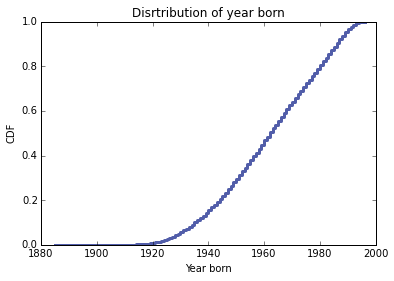

In [28]:
cdf = thinkstats2.Cdf(df.yrbrn)
thinkplot.PrePlot(1)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Year born', ylabel='CDF', 
                 title='Disrtribution of year born', legend=False)

Shifted to mean near 0

In [29]:
df.yrbrn60.describe()

count    232778.000000
mean          1.561960
std          18.670809
min         -75.000000
25%         -12.000000
50%           2.000000
75%          17.000000
max          36.000000
Name: yrbrn60, dtype: float64

Number of years of education, converted to ranks.

In [30]:
df.edurank.describe()

count    231101.000000
mean          0.500264
std           0.288676
min           0.000332
25%           0.250275
50%           0.500278
75%           0.750268
max           1.000000
Name: edurank, dtype: float64

Country codes

In [31]:
df.cntry.value_counts().sort_index()

AT     6918
BE     8939
BG     6064
CH     9310
CY     3293
CZ     8790
DE    11568
DK     7684
EE     6960
ES     9729
FI     7969
FR     5787
GB    11117
GR     9759
HR     3133
HU     7806
IE    10472
IL     7283
IS      579
IT     1207
LT     1677
LU     3187
LV     1980
NL     9741
NO     8643
PL     8917
PT    10302
RO     2146
RU     7544
SE     9201
SI     7126
SK     6944
TR     4272
UA     7809
Name: cntry, dtype: int64

Run the model

In [32]:
def run_model(df, formula):
    model = smf.logit(formula, data=df)    
    results = model.fit(disp=False)
    return results

Here's the model with all control variables and all media variables:

In [33]:
formula = ('hasrelig ~ yrbrn60 + edurank + hincrank +'
           'tvtot + rdtot + nwsptot + netuse')
res = run_model(df, formula)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               hasrelig   No. Observations:               178930
Model:                          Logit   Df Residuals:                   178922
Method:                           MLE   Df Model:                            7
Date:                Mon, 02 Nov 2015   Pseudo R-squ.:                 0.02888
Time:                        11:25:43   Log-Likelihood:            -1.1468e+05
converged:                       True   LL-Null:                   -1.1809e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0169      0.019     53.397      0.000         0.980     1.054
yrbrn60       -0.0075      0.000    -23.097      0.000        -0.008    -0.007
edurank        0.0001      0.020      0.007      0.995        -0.038     0.039
hincrank       0.1207      0.019      6.518      0.000         0.084     0.157
tvtot         -0.0126      0.003     -4.965      0.000        -0.018    -0.008
rdtot         -0.0099      0.002     -5.197      0.000        -0.014    -0.006
nwsptot       -0.0437      0.004    -10.834      0.000        -0.052    -0.036
netuse        -0.1122      0.002    -56.771      0.000        -0.116    -0.108
==============================================================================
"""

Filling all NaNs

In [34]:
formula = ('hasrelig_f ~ yrbrn60_f + edurank_f + hincrank_f +'
           'tvtot_f + rdtot_f + nwsptot_f + netuse_f')
res = run_model(df, formula)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             hasrelig_f   No. Observations:               233856
Model:                          Logit   Df Residuals:                   233848
Method:                           MLE   Df Model:                            7
Date:                Mon, 02 Nov 2015   Pseudo R-squ.:                 0.02725
Time:                        11:25:44   Log-Likelihood:            -1.4865e+05
converged:                       True   LL-Null:                   -1.5281e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0883      0.017     65.490      0.000         1.056     1.121
yrbrn60_f     -0.0075      0.000    -27.305      0.000        -0.008    -0.007
edurank_f     -0.0158      0.017     -0.936      0.349        -0.049     0.017
hincrank_f     0.0874      0.016      5.513      0.000         0.056     0.118
tvtot_f       -0.0125      0.002     -5.661      0.000        -0.017    -0.008
rdtot_f       -0.0153      0.002     -9.119      0.000        -0.019    -0.012
nwsptot_f     -0.0444      0.004    -12.434      0.000        -0.051    -0.037
netuse_f      -0.1043      0.002    -60.354      0.000        -0.108    -0.101
==============================================================================
"""

In [35]:
def extract_res(res, var='netuse_f'):
    param = res.params[var]
    pvalue = res.pvalues[var]
    stars = '**' if pvalue < 0.01 else '*' if pvalue < 0.05 else ''
    return res.nobs, param, stars

extract_res(res)

(233856, -0.10433128546888827, '**')

Group by country:

In [36]:
grouped = df.groupby('cntry')

Run a sample country

In [37]:
gb = grouped.get_group('DK')
run_model(gb, formula).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             hasrelig_f   No. Observations:                 7684
Model:                          Logit   Df Residuals:                     7676
Method:                           MLE   Df Model:                            7
Date:                Mon, 02 Nov 2015   Pseudo R-squ.:                 0.03187
Time:                        11:25:44   Log-Likelihood:                -5059.4
converged:                       True   LL-Null:                       -5226.0
                                        LLR p-value:                 5.116e-68
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.4942      0.101      4.877      0.000         0.296     0.693
yrbrn60_f     -0.0185      0.002    -11.239      0.000        -0.022    -0.015
edurank_f     -0.3665      0.091     -4.033      0.000        -0.545    -0.188
hincrank_f     0.1964      0.087      2.259      0.024         0.026     0.367
tvtot_f       -0.0277      0.013     -2.125      0.034        -0.053    -0.002
rdtot_f        0.0186      0.009      2.122      0.034         0.001     0.036
nwsptot_f      0.0704      0.023      3.013      0.003         0.025     0.116
netuse_f      -0.0222      0.011     -2.065      0.039        -0.043    -0.001
==============================================================================
"""

Run all countries

In [38]:
for name, group in grouped:
    try:
        res = run_model(group, formula)
        nobs, param, stars = extract_res(res)
        arrow = '<--' if stars and param > 0 else ''
        print(name, len(group), nobs, '%0.3g'%param, stars, arrow, sep='\t')
    except:
        print(name, len(group), ' ', 'NA', sep='\t')

AT	6918	6918	-0.0831	**	
BE	8939	8939	-0.0221	*	
BG	6064	6064	0.00219		
CH	9310	9310	-0.0487	**	
CY	3293	3293	-0.279	**	
CZ	8790	8790	-0.0183		
DE	11568	11568	-0.0052		
DK	7684	7684	-0.0222	*	
EE	6960	6960	-0.0359	**	
ES	9729	9729	-0.0804	**	
FI	7969	7969	-0.0508	**	
FR	5787	5787	0.00536		
GB	11117	11117	-0.0155		
GR	9759	9759	-0.033	*	
HR	3133	3133	-0.0382		
HU	7806	7806	-0.0355	**	
IE	10472	10472	-0.0425	**	
IL	7283	7283	0.0661	**	<--
IS	579	579	0.0428		
IT	1207	1207	-0.0656	*	
LT	1677	1677	-0.00865		
LU	3187	3187	-0.0853	**	
LV	1980	1980	-0.0298		
NL	9741	9741	-0.0679	**	
NO	8643	8643	-0.00518		
PL	8917	8917	-0.0924	**	
PT	10302	10302	-0.0945	**	
RO	2146	2146	0.0111		
RU	7544	7544	0.0277	**	<--
SE	9201	9201	-0.0207		
SI	7126	7126	-0.0379	**	
SK	6944	6944	-0.0557	**	
TR	4272	4272	-0.00697		
UA	7809	7809	-0.0451	**	
